# Übung 1: Diskretisierung

**Name:** Senem Dilli, **Matr.-Nr.:** 210503066
<br>
**Name:** Barış Köse, **Matr.-Nr.:** 190503059
<br>
**Name:** Melik Erdem Özen, **Matr.-Nr.:** 190503002

---

## Bearbeitungszeitraum

**Bearbeitungsbeginn:** 30.09.2022
<br>
**Abgabe:** 28.10.2022, 23:55 Uhr

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die Einführung in die Bildverarbeitung mit Python. Sie sollen Bilder einlesen, visualisieren und konvertieren können. Zudem sollen Sie lernen, wie Farb-/Grauwerte eines Bildes manipuliert werden können. 
Sie sollen sich zur Bearbeitung dieser Aufgabe mit den bereits vorgestellten imaging libraries beschäftigen und sie einsetzen.

Für die Visualisierung kann das *matplotlib*-Paket verwendet werden. Alle Diagramme sollen *inline* in diesem Notebook ausgegeben werden. Alle interaktiven Inhalte sollen unter Venwendung der Funktionen des Pakets *ipywidgets* realisiert werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matrikelnummer aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### 1. Einlesen, Visualisierung und Konvertierung 
- 1.1. Lesen sie die Datei "Schwarm.jpg" ein.
Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`). Optional kann auch die cv2.imread-Funktion benutzt werden.
- 1.2. Führen Sie eine einfache, Schwellwert-basierte Konvertierung des Originalbildes durch, in dem Sie die `threshold`- Funktion (mit dem input value `cv2.THRESH_BINARY`) aus der `cv2`-Bibliothek verwenden. 
Visualisieren Sie beide Bilder mit Hilfe der `subplot`-Funktion in einer Zeile dar.
- 1.3. Analysieren Sie die Array-Werte des neu erzeugten Bildes. Was hat die Thresholding-Funktion bewirkt? Nach welchem Kriterium wurden die einzelnen Pixelwerte verändert? (Stichpunktartige Antwort)

***Anmerkung:*** Nachdem Sie bei der ersten Aufgabe BGR in ein GRAY-Bild umgewandelt haben, denken Sie dran plt.imshow(image, cmap='binary‘) zu setzen, damit das Bild nicht in gelb/lila dargestellt wird.

originales bild
 [[114 115 114 ... 143 127 254]
 [112 111 110 ... 141 126 254]
 [109 107 105 ... 140 124 254]
 ...
 [ 54  50  40 ...  59  37 252]
 [ 48  39  34 ...  61  38 252]
 [ 53  45  31 ...  65  39 250]]

konvertiertes bild
 [[  0   0   0 ... 255   0 255]
 [  0   0   0 ... 255   0 255]
 [  0   0   0 ... 255   0 255]
 ...
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]]


Text(0.5, 1.0, 'Threshed')

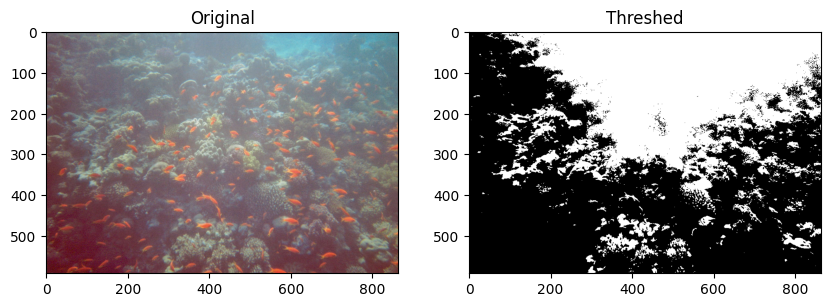

In [1]:
# from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Datei Lesen
img = cv2.imread('Schwarm.jpg')
# BGR zu RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# RGB zu GRAY
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
print("originales bild\n", np.asarray(img_gray))
# Schwellwert-basierte Konvertierung
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
print("\nkonvertiertes bild\n", np.asarray(thresh1))

# Visualisieren beide Bilder mit Hilfe der subplot-Funktion
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img_rgb)
axs[0].set_title('Original')
axs[1].imshow(thresh1, cmap='gray')
axs[1].set_title('Threshed')

# Antwort 1.3) Nach der Konvertierung sind die Werte des Arrays entweder 0 oder 255. Das heißt, dass die Werte kleiner gleich als 127 zu 0 und größer als 127 zu 1 gerundet wurden. 
# 0 steht für Weiß und 255 steht für Schwarz. Die Werte 127 und 255 haben wir entschieden. 


### 2. Binärbild erzeugen

**Interaktive Threshold-Eingabe** 

Das Ziel dieser Aufgabe ist es, aus dem farbigen "Schwarm.jpg" ein Binärbild (also ein s/w-Bild!) zu erzeugen, da Binärbilder die Grundvoraussetzung von vielen Bildverarbeitungsoperationen sind.
Bildverarbeitungsbibliotheken wie `scipy` bieten bereits robuste Schwellwert-basierte Funktionen, die Sie sich gerne anschauen und auch testweise anwenden können. 
Für diese Teilaufgabe sollten Sie jedoch einen Slider implementieren, über den ein Schwellenwert (Grenzen 0 und 255, Schrittweite 1, Standardwert 127) für eine Binärkonvertierung festgelegt werden kann. Konvertieren Sie Originalbild unter Verwendung des Schwellenwertes in ein Binärbild. Eine einfache Konvertierung kann durch folgende Zeile erreicht werden: binary_image = (image >= schwellenwert) * 1. 

***Hinweis:*** 
Nutzen Sie die Funktionen zur Erstellung einer interaktiven Visualisierung aus dem ipywidgets-Paket (siehe auch Demo-Notebook -> Beispiel Gauss-Filter).

In [12]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interactive 

def f(i):
    
    # Datei Lesen
    img = cv2.imread('Schwarm.jpg')
    # BGR zu GRAY
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Schwellwert-basierte Konvertierung
    hi,threshold = cv2.threshold(img_gray,i,255,cv2.THRESH_BINARY)
    plt.imshow(threshold,cmap='gray')

#schwellwert bestimmen mit interaktive plot
interactive_plot = interactive(f, i =(0,255))

interactive_plot

interactive(children=(IntSlider(value=127, description='i', max=255), Output()), _dom_classes=('widget-interac…

### 3. Diskretisierung

Bearbeiten Sie das Originalbild "Schwarm.jpg", indem Sie folgende Operationen durchführen:

- 3.1. Anzahl der Graustufen reduzieren (4 Stufen: 128, 64, 32, 16). Nehmen Sie hier als Ausgangsbild das Grauwert-transformierte Originalbild.
- 3.2. Anzahl der Bildpunkte reduzieren (512x512, 256x256, 128x128, 32x32) 
- 3.2. Anzahl der Farbstufen reduzieren (in 4 Stufen)

Visualisieren Sie diese Teilaufgaben jeweils mit Hilfe der `subplot`-Funktion in einem 2x2-Raster.

***Hinweis:*** 
- Es ist Ihnen überlassen, welche Libraries bzw. welche Funktionen Sie hierfür verwenden. Wichtig ist, dass Sie die Vorgehensweise der eingesetzten Algorithmen nachvollziehen und wiedergeben können!
- Beschreiben Sie bei jeder Teilaufgabe den Ablauf Ihres Algorithmus (stichpunktartige Wiedergabe reicht aus)
- Sie dürfen auch die, in der Vorlesung vorgestellten Algorithmen `Fehlerdiffusion` und `Median Cut` einsetzen, um vorallem eine Grau-/Farbwertreduktion durchzuführen

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
from skimage import io
from PIL import Image, ImageOps
import PIL 

# Datei Lesen
im1 = Image.open(r"Schwarm.jpg")
#Grayscaling
im2 = ImageOps.grayscale(im1)

#image size bestimmen
w, h = im2.size

#Schwellwerte bestimmen 
for row in range(h):
    for col in range(w):
        r,g,b = im2.getpixel((col, row))
        print(g)
        if g<32:
            g=16
        elif g>32 and g<64:
            g=32
        elif g>64 and g<128:
            g=64
        elif g>128:
            g=128
            
        im2.putpixel((col, row), (g))
    
    
im2.show()

117
118
118
116
113
112
114
117
109
112
116
113
117
119
113
120
117
119
120
120
118
117
118
119
120
119
120
125
127
126
126
128
125
126
124
120
119
122
123
121
120
117
118
124
124
119
115
115
125
120
119
123
127
126
123
121
119
118
119
119
120
121
122
123
124
124
127
133
141
145
145
143
145
142
139
137
136
134
132
130
136
130
133
140
138
139
142
140
141
138
136
134
130
125
126
130
131
129
130
134
138
138
139
141
147
143
146
148
142
139
141
141
138
139
140
139
137
138
142
145
140
140
142
145
145
141
138
138
136
142
145
143
140
141
142
142
140
140
142
146
144
139
138
140
143
141
143
147
144
138
141
149
147
149
148
144
144
148
152
153
151
149
147
147
149
150
150
149
147
148
149
148
145
141
137
135
137
138
138
136
134
133
133
134
135
128
129
133
130
130
134
135
132
133
135
136
138
138
137
135
136
136
136
135
135
138
141
144
136
138
139
140
142
148
157
163
165
168
169
167
165
164
161
157
158
154
151
151
150
145
142
141
148
143
141
144
147
146
145
145
148
147
150
157
159
156
155
158
154
159


153
153
151
148
146
146
147
141
139
138
137
138
142
146
149
153
149
148
154
159
159
157
157
155
154
150
145
144
145
143
139
142
139
136
135
136
138
138
138
135
138
138
135
137
141
140
135
138
137
137
137
137
139
140
142
144
139
141
138
139
142
138
139
138
139
140
141
142
143
143
142
144
144
144
145
145
145
145
145
151
154
156
158
159
158
152
146
145
145
145
144
144
145
146
146
145
145
146
146
147
146
146
146
146
145
147
151
150
147
152
160
172
182
183
179
177
174
172
174
180
178
176
173
173
174
172
168
165
164
169
173
172
172
172
167
165
163
162
162
162
163
165
168
167
167
165
163
160
158
157
157
157
156
155
157
158
158
159
161
156
153
153
155
156
156
156
159
155
151
154
157
151
148
149
149
149
148
147
147
148
149
148
147
153
152
150
149
148
149
150
151
145
143
143
144
148
151
153
154
149
149
149
150
151
151
151
150
151
149
151
151
148
155
168
173
179
183
179
167
160
162
162
158
156
156
157
158
160
163
167
170
169
171
173
177
182
182
176
168
171
175
179
179
174
168
163
160
160
159
157


129
125
126
132
133
129
136
133
132
136
142
146
145
142
146
145
144
145
147
146
144
142
149
145
144
146
146
145
146
150
160
156
146
134
130
132
132
129
128
135
139
135
127
126
134
144
150
142
132
128
130
131
129
125
128
129
129
124
120
118
121
125
130
129
131
135
139
139
134
128
129
129
130
132
133
132
129
126
132
129
126
122
122
123
126
128
117
118
119
120
121
121
121
122
128
125
127
126
121
121
124
122
123
123
122
122
122
122
122
122
115
114
117
123
127
125
122
122
121
122
119
114
118
126
127
121
113
118
121
119
117
119
122
122
119
118
119
123
124
121
121
124
118
122
129
126
121
120
107
254
86
93
91
98
98
91
92
85
90
91
91
88
85
85
89
93
95
95
97
97
91
84
86
92
96
109
112
108
108
104
97
96
93
89
87
90
91
89
89
91
91
89
88
90
93
93
89
85
93
92
94
97
96
91
89
89
89
91
90
89
92
98
101
99
101
103
103
102
103
105
104
100
104
109
114
121
121
109
101
106
104
100
100
104
101
94
93
99
105
98
95
100
105
105
103
103
108
111
109
103
100
103
104
102
109
109
110
112
112
109
104
101
104
102
102
104

133
137
136
137
139
137
146
143
138
133
131
134
139
143
139
139
141
142
141
140
143
147
152
152
152
153
153
152
149
147
142
142
142
143
143
144
145
146
144
147
149
148
145
145
150
155
155
156
156
155
156
161
166
167
173
179
181
177
172
168
162
155
149
146
143
140
140
141
142
142
136
134
133
134
134
134
134
136
145
148
149
146
140
135
132
132
129
128
131
133
129
131
136
134
136
137
137
135
130
126
124
124
130
127
125
128
131
132
132
133
126
124
123
125
129
133
133
132
131
131
130
129
128
127
128
129
128
125
124
125
124
121
120
122
124
122
125
126
122
124
127
125
120
120
120
119
117
117
117
117
119
119
126
123
122
126
125
131
125
125
127
132
134
134
131
130
132
135
136
134
131
129
131
134
131
132
134
134
133
131
131
131
137
140
140
138
134
131
128
125
127
130
134
136
137
136
133
130
128
123
120
120
121
119
121
124
122
117
118
119
117
120
123
119
125
124
124
123
122
121
120
120
121
120
119
119
120
121
122
122
120
123
118
123
125
124
128
124
121
123
125
127
127
126
124
123
124
120
125
129


132
133
136
136
134
133
131
129
128
127
130
128
122
116
117
121
120
116
118
121
121
119
120
123
124
122
121
119
124
128
128
132
136
134
130
129
129
130
132
132
129
126
121
121
115
112
117
119
117
120
113
115
118
122
125
127
128
128
121
122
123
120
116
114
115
117
111
114
116
116
114
113
115
118
124
124
126
129
133
133
129
126
128
129
127
122
118
117
117
116
111
111
116
121
120
118
118
120
123
121
118
116
115
116
118
120
119
123
126
126
126
127
125
121
124
116
110
110
111
111
111
112
117
113
112
111
111
115
116
116
108
108
112
116
116
112
111
113
116
114
111
110
110
110
109
108
118
114
116
126
135
138
140
142
149
157
160
152
145
143
144
143
147
148
150
151
149
143
134
127
121
119
116
112
110
109
108
108
110
108
108
108
109
109
108
107
106
107
111
116
120
121
119
116
117
115
112
108
106
104
103
103
111
108
107
107
107
107
111
116
115
124
137
150
159
158
149
140
142
136
133
133
133
131
133
137
134
126
125
124
123
122
107
253
83
81
77
74
75
78
77
74
77
78
79
79
79
80
80
79
69
75
81
82
79
7

145
160
159
161
165
158
143
142
146
141
131
136
143
143
138
138
140
137
146
134
122
120
126
129
128
125
127
125
127
131
132
131
130
132
141
134
132
138
139
134
135
141
145
145
160
171
172
179
182
169
153
160
167
164
160
166
167
157
163
156
151
159
166
179
192
182
186
186
185
181
176
172
172
173
178
157
136
130
131
133
133
134
131
133
131
128
126
127
127
124
129
130
129
127
128
132
133
131
128
128
127
126
127
129
131
132
124
127
128
132
138
137
133
132
132
134
133
130
126
127
133
139
141
137
135
134
133
135
135
130
137
139
137
135
137
135
131
130
135
135
136
142
161
182
190
187
182
168
151
137
131
136
153
170
165
152
144
148
157
160
161
162
161
148
140
141
139
130
123
122
124
122
120
119
120
120
121
121
116
117
118
119
120
121
121
121
118
118
121
125
124
121
120
121
115
117
118
116
116
119
127
134
150
144
139
138
138
132
125
121
116
114
113
114
112
110
112
116
111
110
109
109
109
110
112
113
108
112
111
112
118
120
120
124
116
117
124
127
121
119
126
133
130
127
128
130
128
124
126
133


114
120
124
127
118
120
118
119
126
126
123
125
127
129
126
118
112
110
110
109
111
113
116
121
121
112
107
113
109
108
107
105
104
105
106
108
106
110
111
107
104
106
108
108
109
116
113
106
105
102
100
102
98
103
103
103
107
105
101
103
102
101
103
110
115
114
112
112
110
112
110
112
116
110
104
107
106
107
107
109
114
119
120
118
116
107
109
109
112
114
107
109
108
113
119
122
123
124
127
131
118
119
119
117
114
114
118
123
128
129
129
127
125
124
124
125
125
129
120
114
119
106
83
253
62
55
62
60
53
48
48
66
58
61
58
59
66
64
58
58
66
74
67
64
62
61
69
63
72
69
68
70
70
69
70
73
73
73
72
72
73
74
75
76
73
79
79
78
80
77
73
76
74
78
79
77
77
79
79
75
76
75
77
76
71
76
82
79
78
74
80
74
74
79
79
86
79
80
76
77
83
80
78
87
76
82
83
84
91
89
84
87
86
81
79
83
86
84
80
78
86
92
88
88
87
87
92
88
90
93
104
115
121
134
148
153
162
165
163
156
149
142
131
121
131
117
117
117
106
102
104
98
96
95
90
92
105
119
138
157
156
145
127
116
115
108
98
96
87
88
91
91
90
87
85
83
87
90
90
85
84
85
8

107
111
108
107
115
109
103
105
99
92
100
107
106
100
99
97
96
100
107
105
103
102
103
106
107
107
106
104
101
100
102
104
105
105
94
101
107
108
105
100
100
103
108
108
106
109
118
124
117
106
116
105
109
111
113
141
163
152
124
110
108
108
98
102
109
103
108
117
122
120
118
118
113
104
109
112
111
104
99
104
115
125
137
136
124
109
104
105
117
136
152
157
153
143
131
122
118
113
107
105
102
101
101
101
100
99
97
100
105
110
114
116
115
115
101
102
102
100
99
101
102
99
97
100
98
97
100
99
96
98
93
95
97
99
100
100
100
100
100
101
101
102
110
122
130
132
135
135
131
128
130
136
139
138
138
135
124
127
136
142
144
134
141
143
144
145
149
152
147
138
127
131
138
145
148
146
143
142
137
130
119
110
106
105
104
102
105
104
103
104
106
107
106
104
112
115
116
112
114
122
121
116
108
112
114
115
119
121
118
114
124
120
121
126
130
132
135
141
136
132
132
131
128
122
117
117
121
116
110
107
107
109
108
106
105
105
107
100
107
103
103
97
97
98
99
100
100
100
101
101
99
96
99
94
99
94
99
98
10

119
120
119
102
92
90
90
92
93
89
91
94
90
94
95
91
93
87
91
90
89
91
93
93
90
88
92
96
95
98
98
98
106
107
112
104
101
99
93
88
88
89
88
90
86
90
91
89
94
91
93
96
97
95
96
100
103
103
94
104
110
116
124
124
118
117
120
125
133
138
137
128
115
106
102
101
107
111
113
118
121
116
105
104
107
107
103
105
105
97
96
94
97
97
91
91
94
93
99
94
92
89
87
92
95
89
88
93
86
90
92
91
104
104
100
109
120
126
128
127
126
125
119
117
117
112
103
101
103
99
105
104
111
120
122
126
130
128
132
138
143
141
132
123
119
119
120
124
124
121
128
142
149
147
152
154
142
135
145
147
143
145
151
150
147
145
152
152
139
253
96
98
97
88
78
72
60
43
58
52
51
50
59
45
63
46
41
45
48
45
51
45
53
47
42
49
46
54
54
57
61
60
53
56
53
55
64
64
59
60
66
75
85
85
77
76
79
77
77
75
75
71
74
74
68
75
74
69
72
72
67
72
70
53
54
52
56
56
50
51
55
53
54
56
54
49
49
56
60
59
61
50
52
51
31
47
58
63
54
56
57
55
46
56
53
49
66
63
56
61
55
53
66
58
57
57
57
56
66
63
63
65
61
66
69
68
66
65
64
62
64
58
50
54
52
59
51
54
55
55
5

70
69
69
70
70
71
71
72
72
70
68
68
70
72
74
71
70
73
73
71
70
71
70
71
73
73
72
72
73
75
68
71
71
69
71
75
74
70
70
70
69
69
68
68
67
67
67
73
70
69
77
76
69
67
72
70
68
69
70
71
71
69
67
69
70
70
68
67
68
69
67
69
71
71
70
69
70
72
74
74
74
73
77
82
80
75
73
80
91
103
114
124
135
144
128
114
104
102
100
104
109
109
100
101
90
89
86
81
87
83
87
92
89
83
80
75
72
76
77
73
76
80
78
80
81
76
76
78
78
76
76
78
75
71
73
75
77
75
71
72
77
82
70
72
74
75
74
72
71
71
65
74
75
74
76
77
74
76
70
71
75
80
78
72
69
70
76
70
73
76
74
78
83
79
86
84
81
79
77
77
78
79
79
78
77
77
77
80
85
91
104
93
81
76
75
74
76
79
83
82
77
71
70
73
73
70
70
70
70
70
69
68
68
67
71
70
72
76
78
79
83
88
90
105
112
127
134
132
130
117
105
111
123
127
123
122
116
102
110
103
92
95
94
89
97
102
97
96
95
92
88
84
79
76
78
78
78
81
89
97
98
93
87
82
85
92
93
95
97
95
93
86
92
86
88
95
80
254
61
68
60
53
50
51
59
61
74
75
71
56
63
56
59
63
54
56
50
69
61
52
56
64
52
46
53
53
60
57
61
67
58
56
49
56
56
43
40
39
64
61
50
54

C:\Users\msi-nb\AppData\Local\Temp\ipykernel_19032\3522912971.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im_resized = im.resize(size, Image.ANTIALIAS) # Bildgröße ändern mit dem Key ANTIALIAS


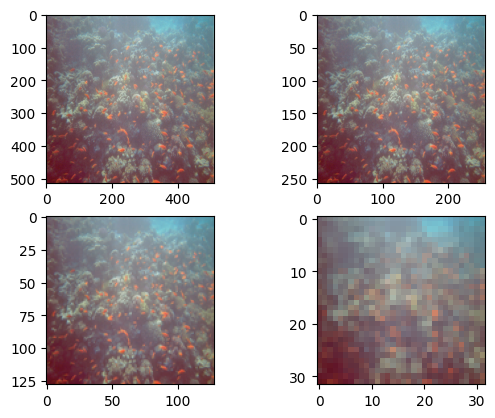

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

sizes = [(512, 512), (256, 256), (128, 128), (32, 32)] # verschiedene Größen
imgs = [] # Liste für die Bilder
im = Image.open("Schwarm.jpg") # Bild öffnen
for size in sizes:
    im_resized = im.resize(size, Image.ANTIALIAS) # Bildgröße ändern mit dem Key ANTIALIAS
    imgs.append(im_resized) # Bilder in eine Liste speichern
    
    #im_resized.show() # Bild anzeigen
    #im_resized.save("low_Schwarm"+str(size)+".png", "PNG") # Bild speichern
f, axarr = plt.subplots(2,2) # 2x2 Subplots
axarr[0,0].imshow(imgs[0])
axarr[0,1].imshow(imgs[1])
axarr[1,0].imshow(imgs[2])
axarr[1,1].imshow(imgs[3])

C:\Users\msi-nb\AppData\Local\Temp\ipykernel_21876\2279418292.py:6: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  result = im.convert('P', palette=Image.ADAPTIVE, colors=4)


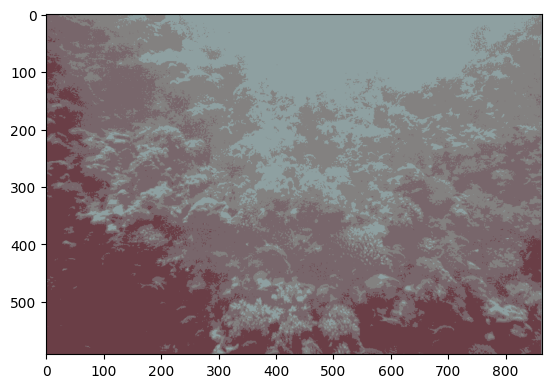

In [19]:
from PIL import Image

#Datei Lesen
im = Image.open("Schwarm.jpg")
#Bild konvertierung mit konvertfunktion
result = im.convert('P', palette=Image.ADAPTIVE, colors=4) 
f, axarr = plt.subplots(1,1)
axarr.imshow(result)